In [32]:
import pandas as pd

df_features = pd.read_csv('chapter01_abnormal_features.csv')
df_target = pd.read_csv('chapter01_abnormal_target.csv')

features data set: time 별 센서에서 수집되고 있는 S1~S4 값


target data set: 장비에 전달된 M,V 값

## 데이터 전처리 하는 방법
---
  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  



In [33]:
# 1. 데이터 형태 확인
print("feature:", df_features.shape)
print("target", df_target.shape)

feature: (1050000, 6)
target (2800, 5)


→ feature와 target의 row개수가 다름


In [34]:
# 2. data type 확인
print("feature", df_features.info())
print("target", df_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1050000 non-null  int64  
 1   Time    1050000 non-null  float64
 2   S1      1050000 non-null  float64
 3   S2      1050000 non-null  float64
 4   S3      1050000 non-null  float64
 5   S4      1050000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.1 MB
feature None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2800 non-null   int64  
 1   X       2800 non-null   float64
 2   Y       2800 non-null   float64
 3   M       2800 non-null   float64
 4   V       2800 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 109.5 KB
target None


In [35]:
# 3. Null값 확인
print(df_features.isnull().sum())
print(df_target.isnull().sum())

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64
id    0
X     0
Y     0
M     0
V     0
dtype: int64


In [36]:
#4. unique한 ID 개수 확인
print('feature_unique_id',len(df_features['id'].unique()))
print('target_unique_id',len(df_target['id'].unique()))

feature_unique_id 2800
target_unique_id 2800


→ id 개수가 동일한 것으로 보아, feature data가 id당 다수의 데이터를 가지고 있음. 

In [37]:
df_features[df_features['id']==0].head(5)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [38]:
# Target data set과 차원을 맞춰주기 위해 id 별로 Sensor 값의 평균 사용
df_features_proc = df_features.groupby('id').mean()

In [39]:
#아이디에 맞춰서 값 합치기 
df_merge = pd.merge(df_features_proc, df_target, on = 'id', how= 'left')

In [40]:
df_merge.head(5)

,id,Time,S1,S2,S3,S4,X,Y,M,V
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893,0.0,-400.0,50.0,0.4
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221,400.0,0.0,100.0,1.0
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340,-300.0,-200.0,25.0,0.4
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867,200.0,-100.0,150.0,0.4
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287,-300.0,-100.0,150.0,0.4


In [41]:
# 전처리 완료한 데이터 셋 -> time, x, y 는 필요없으므로 지우기
df_merge = df_merge.drop(['Time','X','Y'],axis = 1 )
df_merge.head(5)

,id,S1,S2,S3,S4,M,V
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4


### 이상 
---
사전 점검을 하기 위한 이상 현상을 정의 

In [42]:
# MV = 최종 충돌 에너지로 정의하고 새로운 col 생성 
df_merge['MV'] = df_merge['M']*df_merge['V']

충돌에너지평군: 60.0


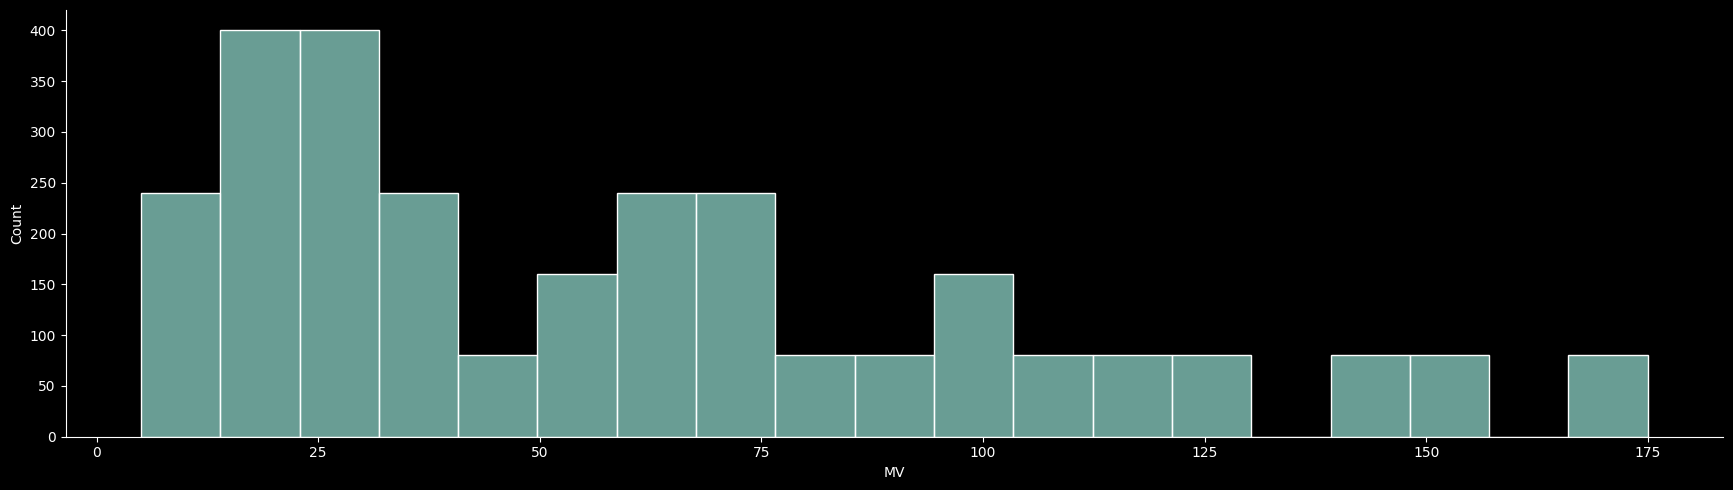

In [43]:
# 이상을 정의하기 위해 충돌에너지 분포 확인 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
plt.style.use(['dark_background'])

sns.displot(df_merge['MV'])
plt.gcf().set_size_inches(20,5)
print("충돌에너지평군:", df_merge['MV'].mean())

대다수 충돌 에너지가 평균인 60선에 분포함. 

- 이상을 정의하는 방법은 다양하고, 현업에 기준이 존재할 확률이 큼
- 현업 기준이 존재하지 않는다면, 보통 데이터 평균에서 ±1, ±2, ±3 sd(표준편차) 떨어진 데이터들을 이상으로 가정하는 경우가 많음


In [44]:
import numpy as np
df_merge['abnormal'] = np.where(df_merge['MV'] > df_merge['MV'].mean() + 2*df_merge['MV'].std(),1,0)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0


In [31]:
# 이상 데이터 분포 확인
df_merge['abnormal'].value_counts()

abnormal
0    2640
1     160
Name: count, dtype: int64

약 6%가 이상징후를 보임 

## Rule base 이상진단
---
이상을 정의했다면, 이상 시점의 센서 데이터 분포를 탐색
각 센서 (S1~S4)에 대해 이상(1)상태와 이상이 아닌 상태(0)의 상태를 비교

In [48]:
print('abnormal:',df_merge[df_merge['abnormal']==1]['S1'].mean(),'normal:',df_merge[df_merge['abnormal']==0]['S1'].mean())
print('abnormal:',df_merge[df_merge['abnormal']==1]['S2'].mean(),'normal:',df_merge[df_merge['abnormal']==0]['S2'].mean())
print('abnormal:',df_merge[df_merge['abnormal']==1]['S3'].mean(),'normal:',df_merge[df_merge['abnormal']==0]['S3'].mean())
print('abnormal:',df_merge[df_merge['abnormal']==1]['S4'].mean(),'normal:',df_merge[df_merge['abnormal']==0]['S4'].mean())

abnormal: -910.6725618222317 normal: -374.457459218389
abnormal: -910.6725618222324 normal: -374.45745931738884
abnormal: -3662.427652993808 normal: -1193.247454043241
abnormal: -4473.323652485669 normal: -1431.8663172477716


정상과 비정상의 평균 값이 다른 것을 확인

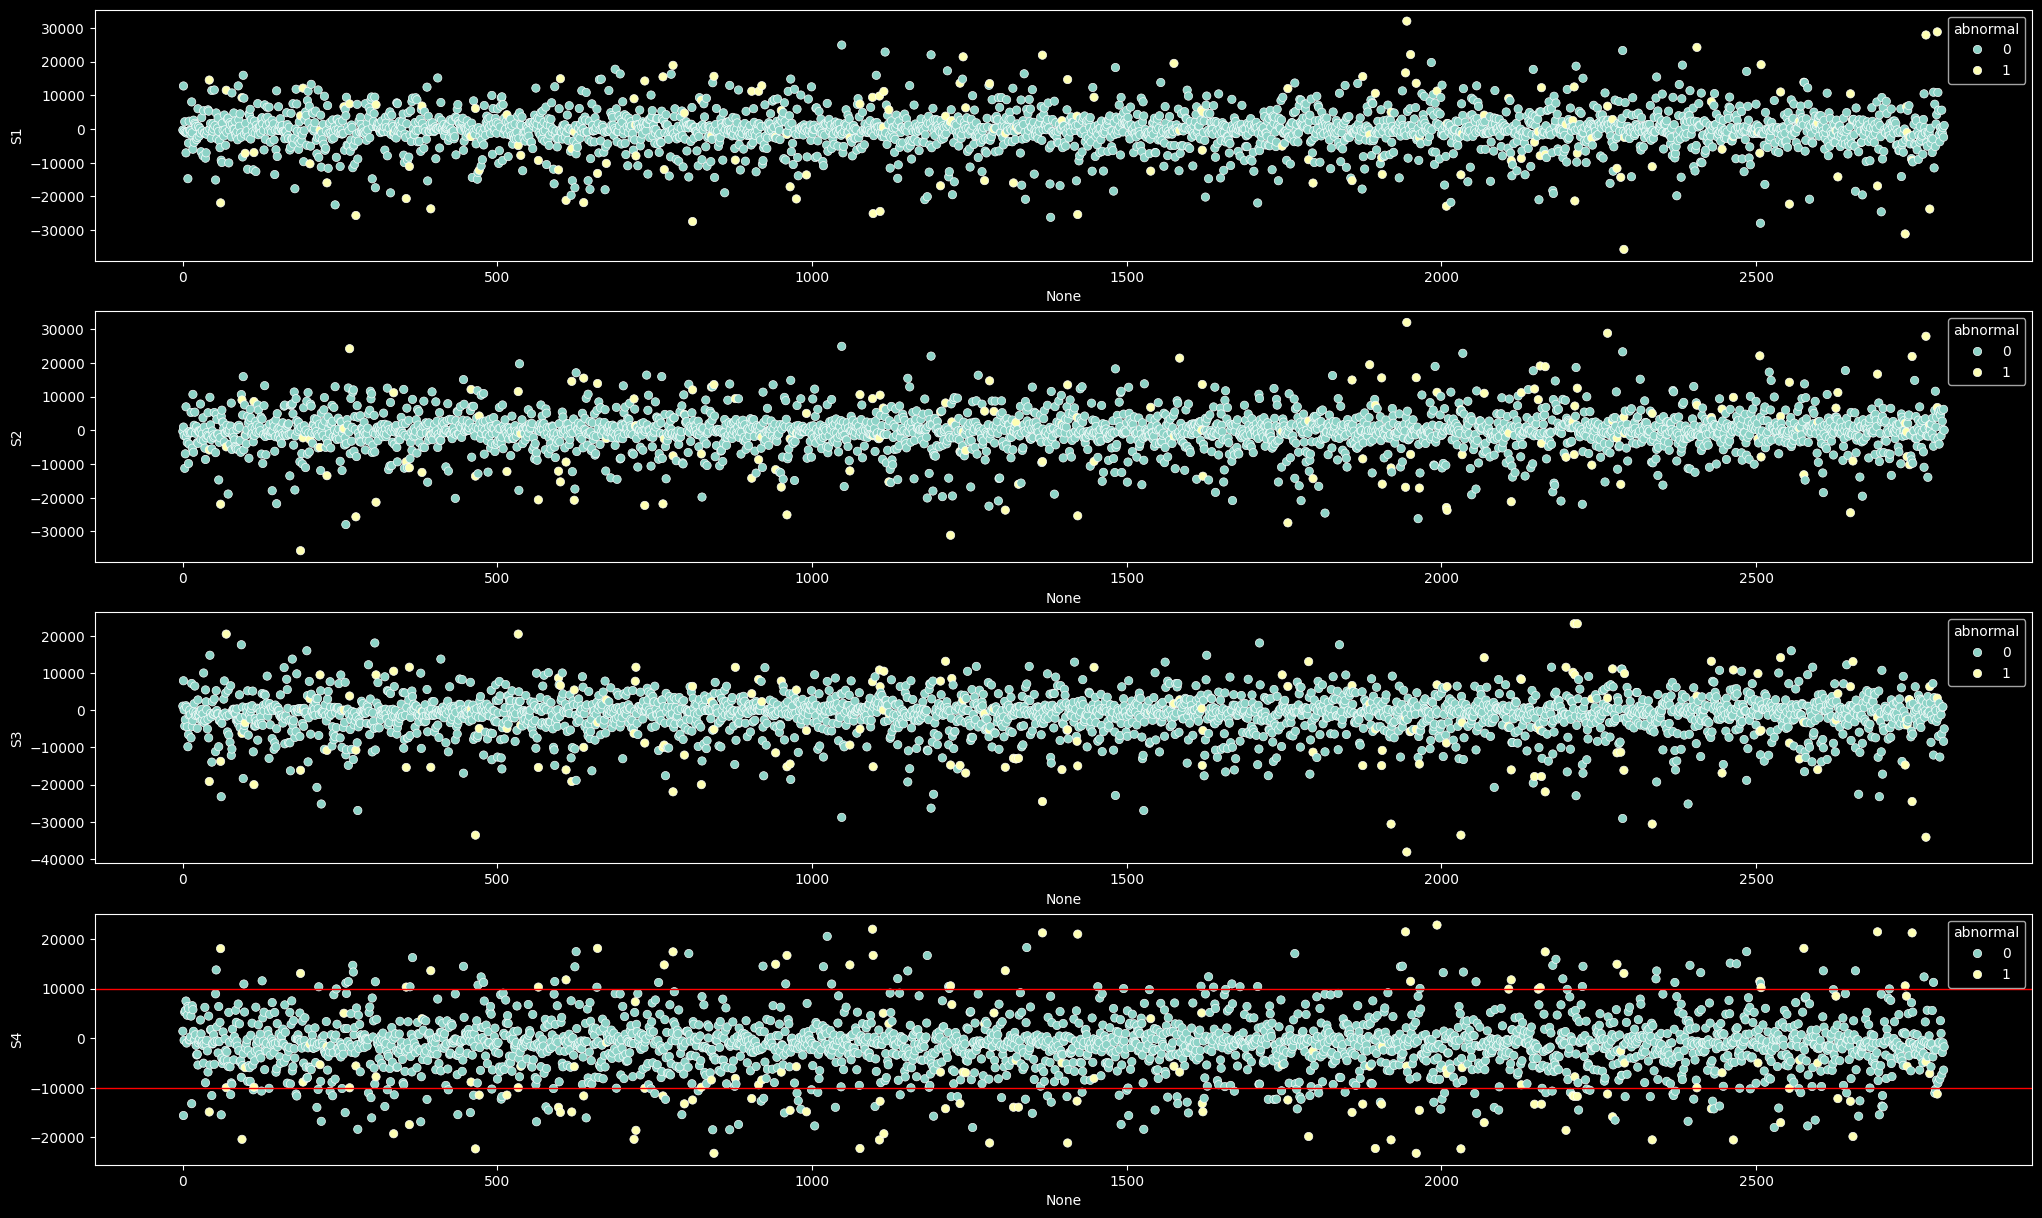

In [51]:
# 더 정확한 분포를 위해 산점도 그리기

fig, axes = plt.subplots(4,1)
sns.scatterplot(x=df_merge.index, y=df_merge['S1'], hue = df_merge['abnormal'], ax = axes[0])
sns.scatterplot(x=df_merge.index, y=df_merge['S2'], hue = df_merge['abnormal'], ax = axes[1])
sns.scatterplot(x=df_merge.index, y=df_merge['S3'], hue = df_merge['abnormal'], ax = axes[2])
sns.scatterplot(x=df_merge.index, y=df_merge['S4'], hue = df_merge['abnormal'], ax = axes[3])
plt.axhline(y=10000, color = 'r', linewidth = 1)
plt.axhline(y=-10000,color='r',linewidth = 1)
plt.gcf().set_size_inches(25,15)

센서값이 중앙에서 멀어질 수록 이상이 더 많이 발생하고 있는 추세

### Rule base 이상진단
---
scatter plot을 통해 각 센서 값이 10,000초과 -10,000미만 일시 더 많은 불량이 발생하는 인사이트 확인


실제 평균 이상률(6%) 대비 더 많은 불량이 발생하는지 수치 확인

In [ ]:
# S1 불량률 확인
df_s1 = df_merge[(df_merge['S1']>10000) | (df_merge['S1']<-10000)]
df_s1_abnormal_ratio = (len(df_s1[df_s1['abnormal']==1]) / len(df_s1)) * 100
df_s1_abnormal_ratio

26.978417266187048

In [ ]:
# S2 불량률 확인
df_s2 = df_merge[(df_merge['S2']>10000) | (df_merge['S2']<-10000)]
df_s2_abnormal_ratio = (len(df_s2[df_s2['abnormal']==1]) / len(df_s2)) * 100
df_s2_abnormal_ratio

26.978417266187048

In [ ]:
# S3 불량률 확인
df_s3 = df_merge[(df_merge['S3']>10000) | (df_merge['S3']<-10000)]
df_s3_abnormal_ratio = (len(df_s3[df_s3['abnormal']==1]) / len(df_s3)) * 100
df_s3_abnormal_ratio

28.627450980392155

In [ ]:
# S4 불량률 확인
df_s4 = df_merge[(df_merge['S4']>10000) | (df_merge['S4']<-10000)]
df_s4_abnormal_ratio = (len(df_s4[df_s4['abnormal']==1]) / len(df_s4)) * 100
df_s4_abnormal_ratio

31.333333333333336

In [58]:
# S1, S2, S3, S4가 10,000 초과, -10,000 미만 일시 이상으로 예측
df_merge['rule_base1'] = np.where( ((df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)) , 1, 0)
df_merge['rule_base2'] = np.where( ((df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)) , 1, 0)
df_merge['rule_base3'] = np.where( ((df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)) , 1, 0)
df_merge['rule_base4'] = np.where( ((df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)) , 1, 0)

In [59]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


In [62]:
# precision: 예측한 것 중에 실제로 정답인 비율
# recall: 실제 정답 중에서 예측으로 맞춘 비율
# S4 센서를 기준으로 이상을 예측 했을 때가 Best Score(recall 0.59)
# 실제값(abnormal)과 내가 만든 규칙의 예측 결과를 비교해서 성능 리포트 출력 
from sklearn.metrics import classification_report
print(classification_report(df_merge['abnormal'], df_merge['rule_base1']))
print(classification_report(df_merge['abnormal'], df_merge['rule_base2']))
print(classification_report(df_merge['abnormal'], df_merge['rule_base3']))
print(classification_report(df_merge['abnormal'], df_merge['rule_base4']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2640
           1       0.29      0.46      0.35       160

    accuracy                           0.90      2800
   macro avg       0.63      0.69      0.65      2800
weighted avg       0.93      0.90      0.91      2800

              preci

## ML 활용 이상진단 및 예측

### 모델링 위한 데이터 준비
---
모델링 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터 나눔


학습과 예측을 위한 Train/Test set 분할

In [ ]:
# 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# X: 입력 데이터
# Y: 정답 라벨 -> 모델이 맞춰야 하는 목표 값

X=df_merge.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_merge['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 4)
(1960,)
(840, 4)
(840,)


### 모델 학습 및 평가
모델을 학습하고 예측을 수행하여 성능 평가

In [66]:
# 모델 학습
rfc = RandomForestClassifier(random_state = 1234)
rfc.fit(x_train, y_train)

# 예측
# 학습에 사용된 데이터와 Test 데이터 모두 예측하고 평가 (과적합 여부 판별)
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      1.00      1.00       112

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       792
           1       0.86      0.52      0.65        48

    accuracy                           0.97       840
   macro avg       0.92      0.76      0.82       840
weighted avg       0.97      0.97      0.96       840



### Hyper parameter 튜닝

모델 성능을 올리기 위한 옵션 조절 

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400,500],
          'max_depth': [6,8,10,12]}

# RandomForesetClassifier 객체 생성 후 GridSearchCV 수행 

rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 3, n_jobs=-1, scoring='recall')
# 훈련 데이터(x_train, y_train)를 넣고, 각 하이퍼파라미터 조합마다 학습 + 검증
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'n_estimators': 500}
최고 예측 정확도: 0.4016


In [68]:
# Best score 파라미터로 다시 재학습
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state = 1234)
rfc.fit(x_train, y_train)

# 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1848
           1       1.00      0.87      0.93       112

    accuracy                           0.99      1960
   macro avg       1.00      0.93      0.96      1960
weighted avg       0.99      0.99      0.99      1960

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       792
           1       0.86      0.50      0.63        48

    accuracy                           0.97       840
   macro avg       0.91      0.75      0.81       840
weighted avg       0.96      0.97      0.96       840



In [69]:
pd.Series(y_pred_train).value_counts()

0    1863
1      97
Name: count, dtype: int64

### 중요 변수 파악
Feature IMP 분석 통한 중요변수 파악

In [70]:
x_train.columns

Index(['S1', 'S2', 'S3', 'S4'], dtype='object')

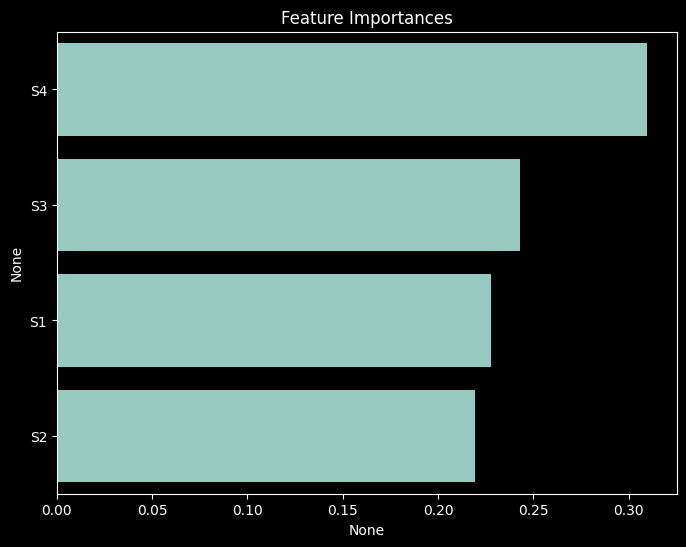

In [71]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index= x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title ('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 변수 추가
---
모델의 성능을 향상시키기 위한 추가 변수 탐색

In [72]:
df_new = df_merge.copy()

df_new['S1_2']=df_new['S1']*df_new['S1']
df_new['S2_2']=df_new['S2']*df_new['S2']
df_new['S3_2']=df_new['S3']*df_new['S3']
df_new['S4_2']=df_new['S4']*df_new['S4']

df_new.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4,S1_2,S2_2,S3_2,S4_2
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0,9.505170e+04,9.505170e+04,1.253291e+06,1.989518e+06
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1,1.633329e+08,9.638896e+05,6.325071e+07,2.428846e+08
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0,4.546665e+05,2.482774e+06,1.888707e+04,1.657242e+05
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0,4.683835e+06,1.271195e+08,1.782307e+07,2.747176e+07
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0,9.613422e+05,4.853787e+07,6.531842e+06,3.132564e+07


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

X=df_new.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_new['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 8)
(1960,)
(840, 8)
(840,)


In [ ]:
# 학습
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=1234)
rfc.fit(x_train, y_train)

# 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train)) # 실제로 배운 데이터
print(classification_report(y_test, y_pred_test)) # 새로운 데이터


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      0.97      0.99       112

    accuracy                           1.00      1960
   macro avg       1.00      0.99      0.99      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       792
           1       0.71      0.42      0.53        48

    accuracy                           0.96       840
   macro avg       0.84      0.70      0.75       840
weighted avg       0.95      0.96      0.95       840



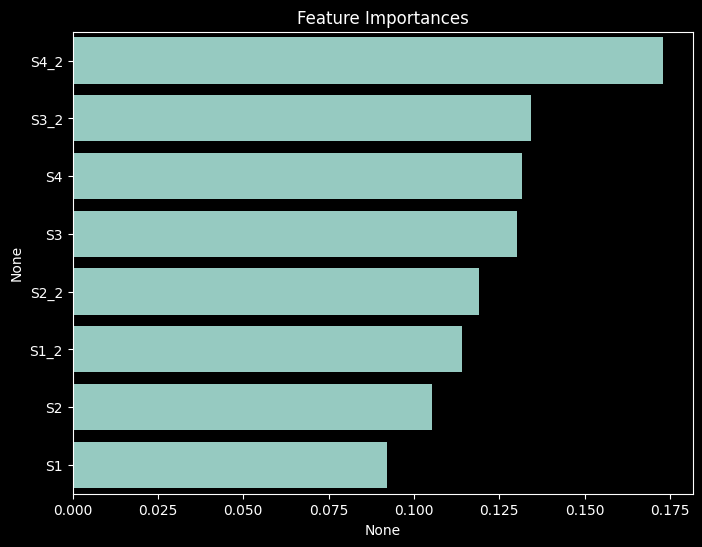

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 변수가 클 수록 모델의 의사결정에 더 큰 영향을 미침 

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)